# CLASSIFICATION AND CLUSTERING

# Problem Description
**Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out the accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,**
* Sepal Length
* Sepal Width
* Petal length
* Petal width

**Using above 4 features you will classify a flower  in one of the three categories,**

* Setosa
* Versicolour
* Virginica

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
#Load the Isis dataset
iris_data = load_iris()
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# Create a DataFrame
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the target variable 'species' to the DataFrame
df['class'] = iris_data.target


df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
df.shape

(150, 5)

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [13]:
df.duplicated().sum()

1

# Understanding the distirbution of the data

In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Data preprocessing

In [15]:
# Dropping Duplicates
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [16]:
df.duplicated().sum()

0

In [17]:
unique_classes = df['class'].unique()
print(unique_classes)

[0 1 2]


In [18]:
df['class'].value_counts()

class
0    50
1    50
2    49
Name: count, dtype: int64

In [19]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

# Visualization

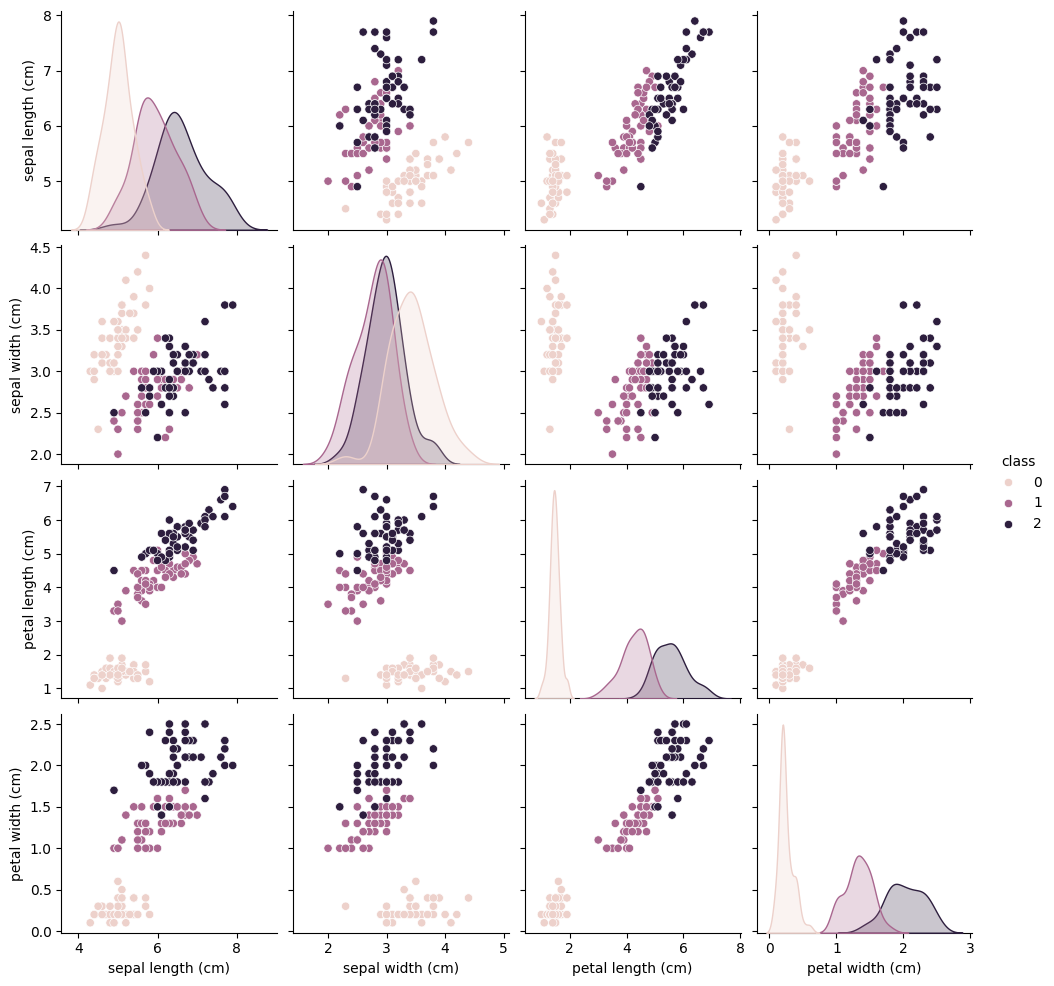

In [20]:
sns.pairplot(df, hue='class')
plt.show()

* **Pairplot Analysis:** *The pairplot reveals that Setosa is easily distinguishable from the other two species based on all feature pairs, particularly petal length and petal width. However, Versicolor and Virginica exhibit considerable overlap, making them harder to differentiate.*

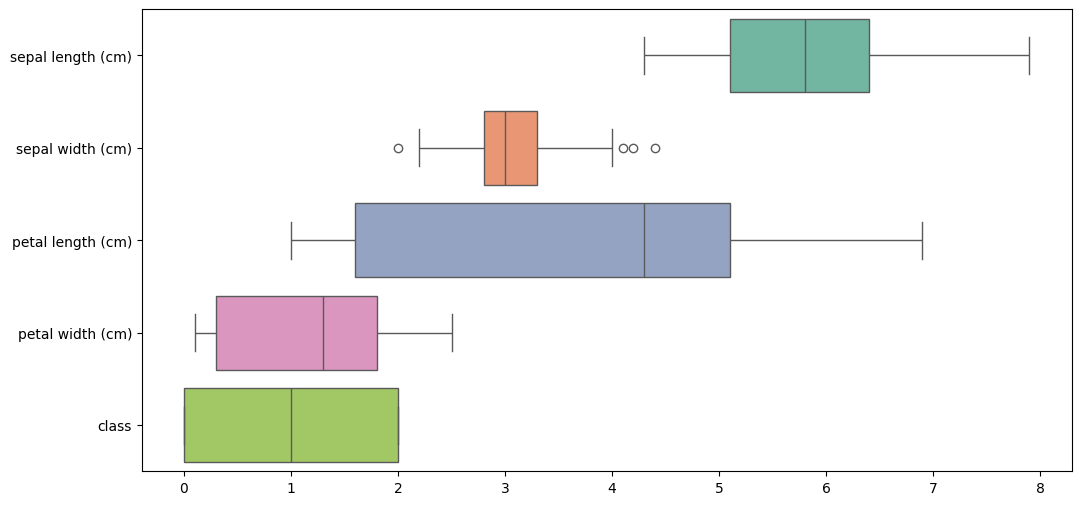

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.show()


* **Boxplot Summary:** *The boxplots highlight the differences in feature distributions across species. Setosa consistently shows distinct median values and narrower interquartile ranges for petal length and width, while Versicolor and Virginica have overlapping distributions, especially in sepal length and width, indicating variability within these features.*

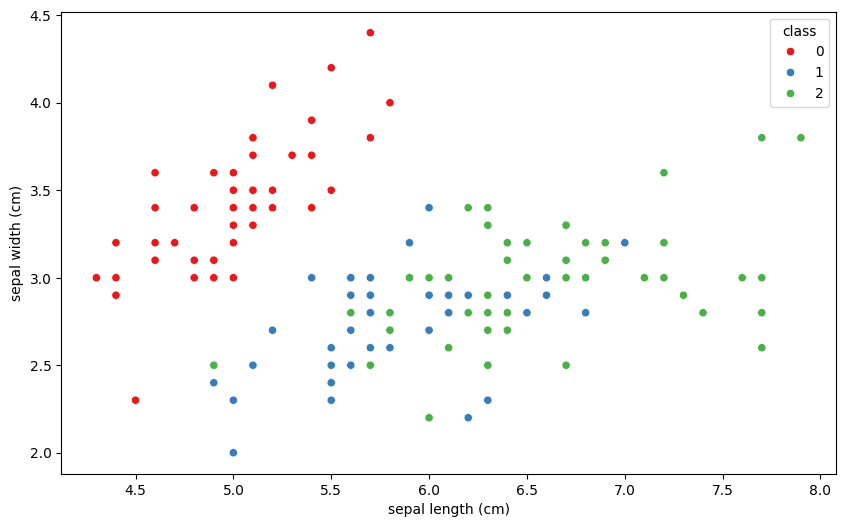

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='class', data=df, palette="Set1")
plt.show()


* **Scatter Plot Insight:** *The scatter plot emphasizes the clear separation of Setosa from the other species when considering sepal dimensions. Nonetheless, the overlapping clusters of Versicolor and Virginica underscore the challenge in distinguishing these species based on sepal measurements alone.*

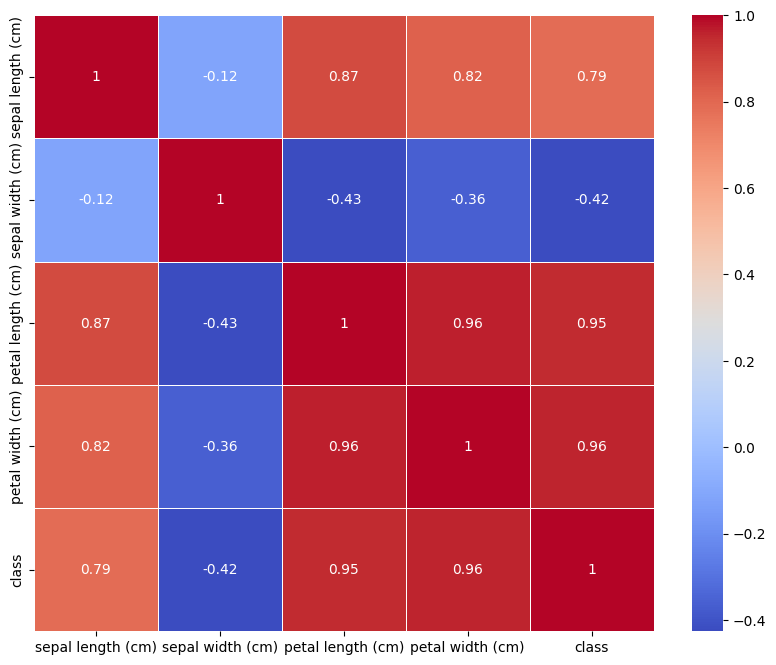

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [24]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.118129,0.873738,0.820620,0.786971
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal length (cm),0.873738,-0.426028,1.000000,0.962772,0.949402
petal width (cm),0.820620,-0.362894,0.962772,1.000000,0.956514
class,0.786971,-0.422987,0.949402,0.956514,1.000000


# Feature scaling

In [25]:
# Separate features and target
x = df.iloc[:, :-1]
y = df['class']

In [26]:
colnames=x.columns.tolist()

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(x)


df_scaled = pd.DataFrame(X_min_max_scaled, columns=colnames)
df_scaled['class'] = y

df_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


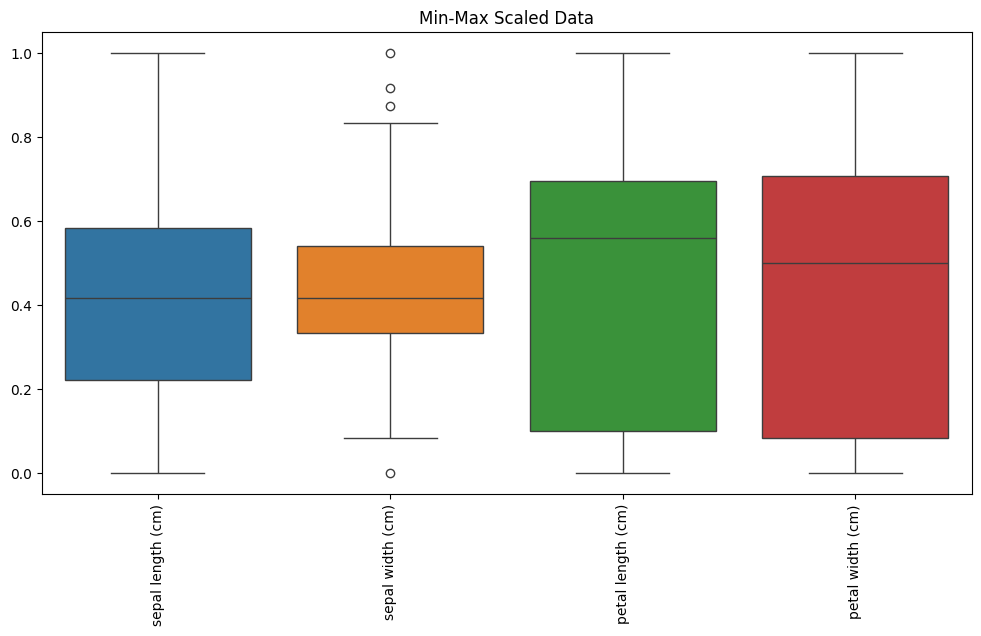

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the scaled data
def plot_scaled_data(df_scaled, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_scaled.iloc[:, :-1])
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()


plot_scaled_data(df_scaled, 'Min-Max Scaled Data')



# Model Building

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)




In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

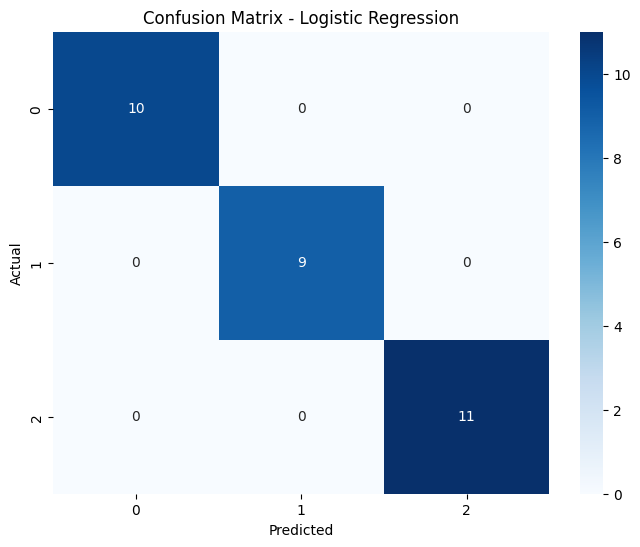

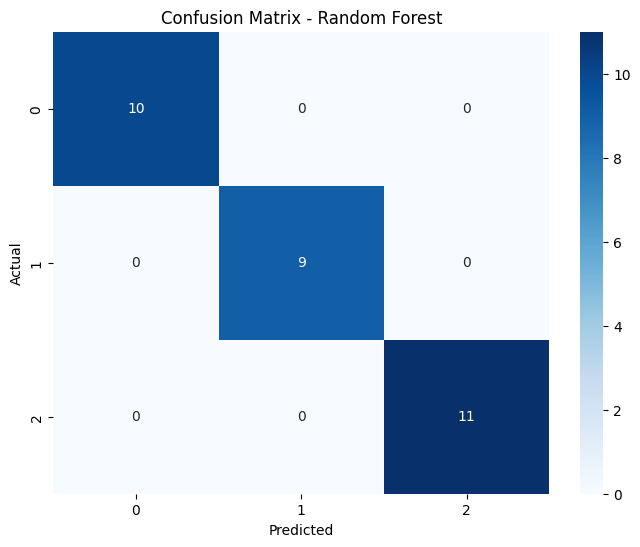

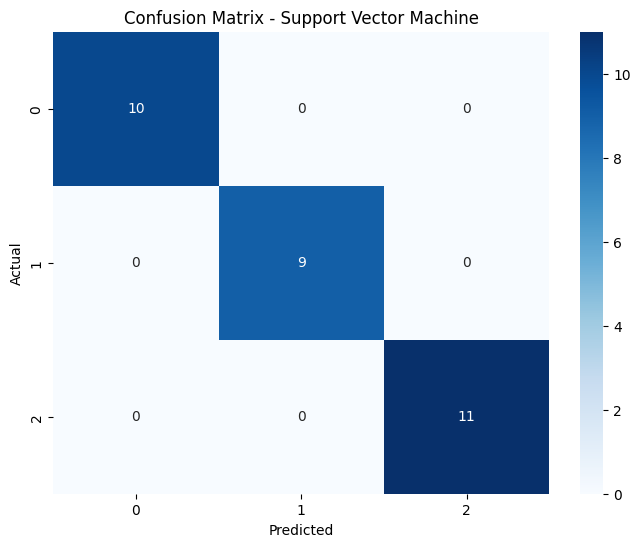

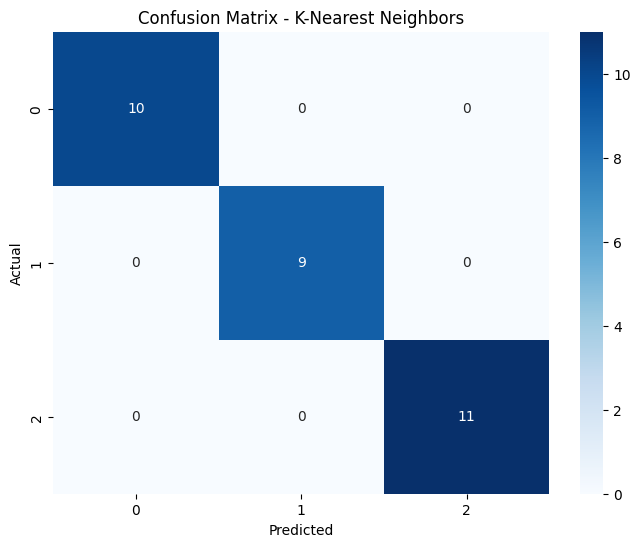

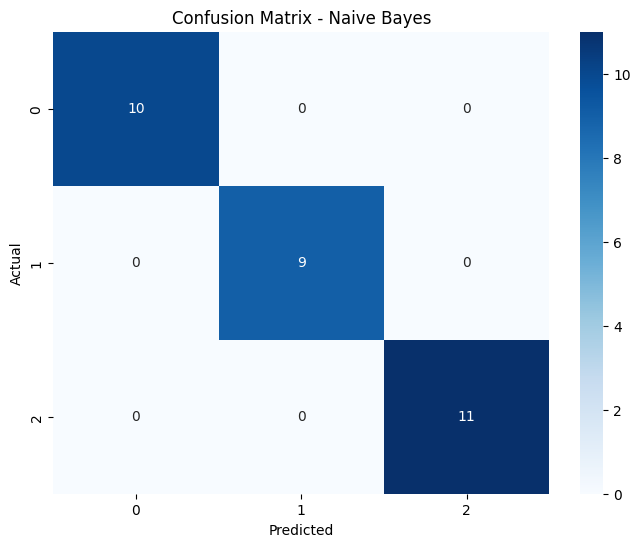

                    Model  Train Accuracy  Test Accuracy  Train Precision  \
0     Logistic Regression        0.966387            1.0         0.966453   
1           Random Forest        1.000000            1.0         1.000000   
2  Support Vector Machine        0.966387            1.0         0.966196   
3     K-Nearest Neighbors        0.957983            1.0         0.957692   
4             Naive Bayes        0.949580            1.0         0.949294   

   Test Precision  Train Recall  Test Recall  Train F1 Score  Test F1 Score  
0             1.0      0.966838          1.0        0.966239            1.0  
1             1.0      1.000000          1.0        1.000000            1.0  
2             1.0      0.966196          1.0        0.966196            1.0  
3             1.0      0.958066          1.0        0.957779            1.0  
4             1.0      0.949294          1.0        0.949294            1.0  


In [32]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()  # Adding Naive Bayes
}

# Dictionary to store evaluation metrics
eval_metrics = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': [],
                'Train Precision': [], 'Test Precision': [],
                'Train Recall': [], 'Test Recall': [],
                'Train F1 Score': [], 'Test F1 Score': []}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    # Training data evaluation
    train_pred = classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred, average='macro')
    train_recall = recall_score(y_train, train_pred, average='macro')
    train_f1 = f1_score(y_train, train_pred, average='macro')

    # Testing data evaluation
    test_pred = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred, average='macro')
    test_recall = recall_score(y_test, test_pred, average='macro')
    test_f1 = f1_score(y_test, test_pred, average='macro')

    # Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)

    # Storing evaluation metrics
    eval_metrics['Model'].append(name)
    eval_metrics['Train Accuracy'].append(train_accuracy)
    eval_metrics['Test Accuracy'].append(test_accuracy)
    eval_metrics['Train Precision'].append(train_precision)
    eval_metrics['Test Precision'].append(test_precision)
    eval_metrics['Train Recall'].append(train_recall)
    eval_metrics['Test Recall'].append(test_recall)
    eval_metrics['Train F1 Score'].append(train_f1)
    eval_metrics['Test F1 Score'].append(test_f1)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Create DataFrame for summary
summary_df = pd.DataFrame(eval_metrics)
print(summary_df)


In [34]:
summary_df = pd.DataFrame(eval_metrics)
summary_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.966387,1.0,0.966453,1.0,0.966838,1.0,0.966239,1.0
1,Random Forest,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
2,Support Vector Machine,0.966387,1.0,0.966196,1.0,0.966196,1.0,0.966196,1.0
3,K-Nearest Neighbors,0.957983,1.0,0.957692,1.0,0.958066,1.0,0.957779,1.0
4,Naive Bayes,0.949580,1.0,0.949294,1.0,0.949294,1.0,0.949294,1.0


* Based on the evaluation metrics, the Random Forest model achieved perfect scores across all metrics, indicating that it performed exceptionally well on both the training and test data sets. The Support Vector Machine and Logistic Regression models also performed reasonably well, with slightly lower scores on the training set compared to the test set.
* The K-Nearest Neighbors model had the lowest training accuracy, precision, recall, and F1 score among the models evaluated, although its test scores were still perfect. The Naive Bayes model also had lower training scores compared to the other models.

# Data Story and Conclusion:

* The provided evaluation metrics suggest that the Random Forest model is the most suitable for this classification task, as it achieved perfect scores on both the training and test data sets. This indicates that the model was able to learn the underlying patterns in the data effectively and generalize well to unseen instances.
* The Support Vector Machine and Logistic Regression models also performed reasonably well, with slightly lower scores on the training set compared to the test set. This could be due to overfitting or underfitting issues, or it could be a result of the specific characteristics of the data set.

* The K-Nearest Neighbors and Naive Bayes models had lower training scores, suggesting that they may not have captured the underlying patterns in the data as effectively as the other models. However, their perfect test scores indicate that they were still able to generalize well to unseen instances.

*  In conclusion, based on the provided evaluation metrics, **the Random Forest model emerges as the top-performing model for this classification task**, followed by the Support Vector Machine and Logistic Regression models.

# **Clustering**

## K-Means Clustering

In [42]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
np.array(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

array([678.93288591, 151.99686714,  78.11047368,  56.83295398,
        46.00700526,  38.60081046,  34.34824287,  30.57186472,
        28.158176  ])

**Within-Cluster Sum of Squares (WCSS):** WCSS measures the compactness of the clusters formed by the KMeans algorithm. It calculates the sum of squared distances between each data point and its nearest centroid within the same cluster. The lower the WCSS, the better the clustering.

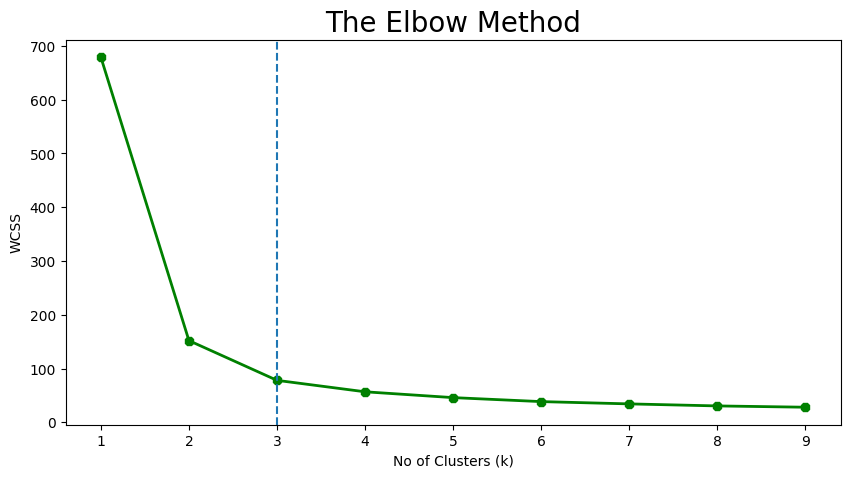

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
ax = plt.plot(range(1,10),wcss,linewidth = 2, color = 'green',marker = '8')
plt.axvline(x=3,ls='--')
plt.ylabel('WCSS')
plt.xlabel('No of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()


**Elbow Method:** The plot of the number of clusters against the corresponding WCSS forms an elbow-shaped curve. The "elbow" point, where the rate of decrease sharply changes, is often considered the optimal number of clusters. It signifies the point where adding more clusters doesn't lead to a substantial improvement in clustering quality.

**K=3 from the Elbow plot.**

In [49]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [50]:
clusters=km.predict(x)


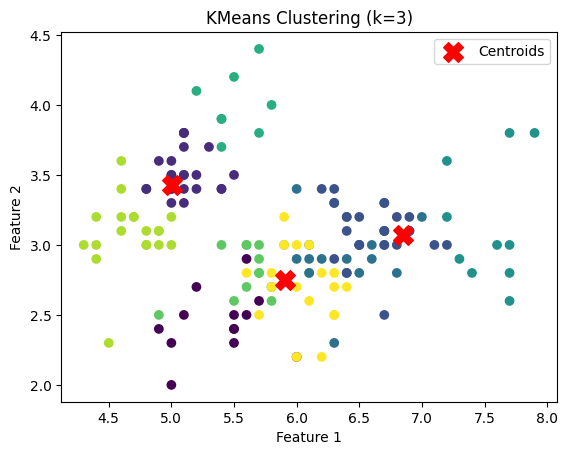

In [51]:
# Visualize the clusters (optional)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=clusters, cmap='viridis')  # Access features using iloc for DataFrame
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



**Model Evaluation**

**Silhouette Analysis**

* We can use the silhouette score to evaluate the quality of clustering. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering.

In [52]:
# Analyze cluster centroids
cluster_centers = kmeans.cluster_centers_
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i+1} centroid coordinates: {centroid}")

Cluster 1 centroid coordinates: [6.85       3.07368421 5.74210526 2.07105263]
Cluster 2 centroid coordinates: [5.006 3.428 1.462 0.246]
Cluster 3 centroid coordinates: [5.90327869 2.74918033 4.38196721 1.42622951]


In [54]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(x, clusters)
print(f'Silhouette Score: {silhouette_avg}')




Silhouette Score: 0.3160385346243337


*  A silhouette score of 0.316 suggests that the clustering is somewhat meaningful, but there might be room for improvement. Typically, silhouette scores range from -1 to 1, where a score closer to 1 indicates better-defined clusters, and a score closer to -1 indicates overlapping or poorly defined clusters. A score around 0.316 indicates that the clusters are somewhat distinct but not highly separated.

# Hierarchical Clustering

In [67]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

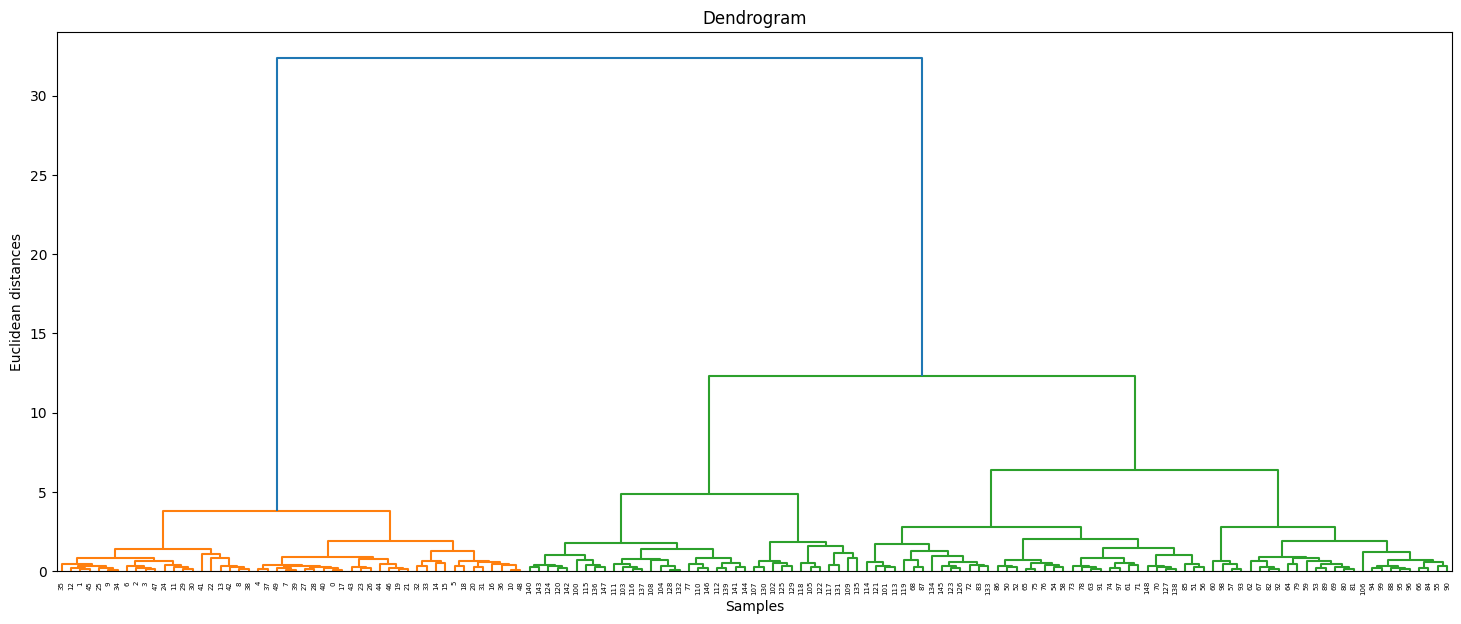

In [69]:
plt.figure(figsize=(18, 7))
linked = linkage(x, method='ward')
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')

plt.show()

# **Determining the Optimal Number of Clusters**

The dendrogram helps in determining the optimal number of clusters. Look for the longest vertical line that can be cut without intersecting any other horizontal line. This point suggests a threshold distance where clusters should be formed.

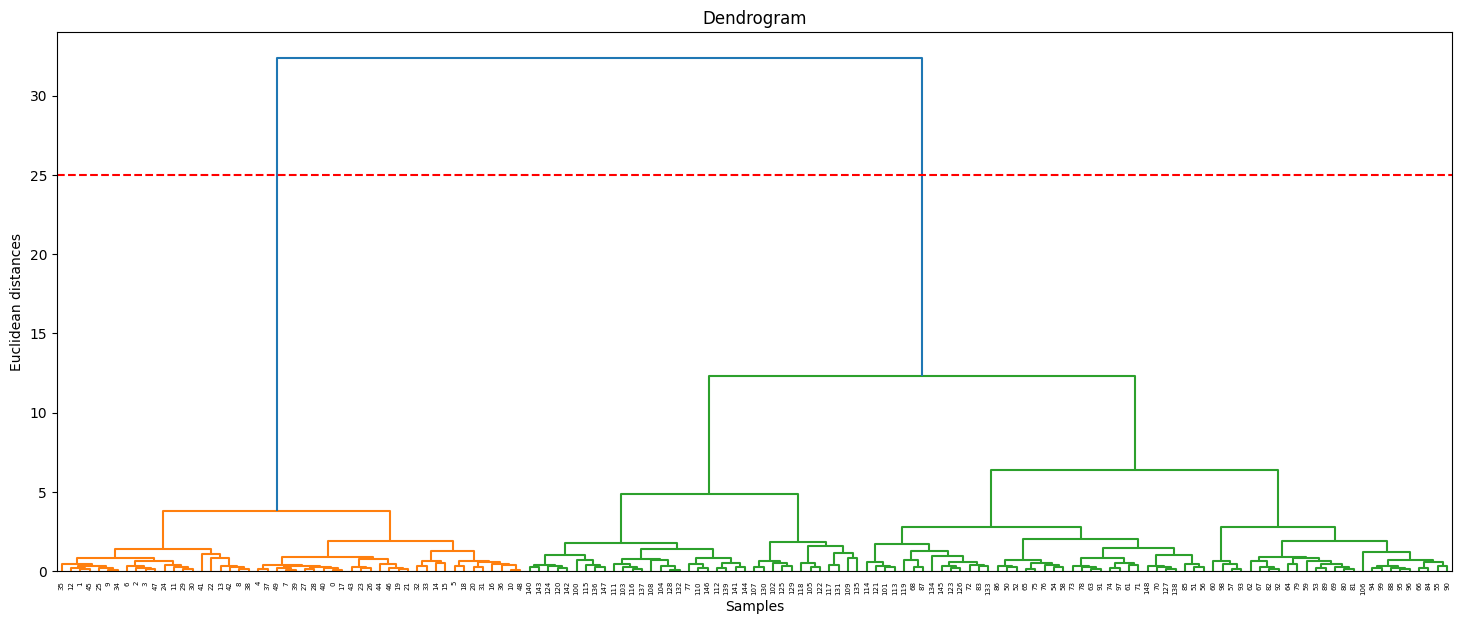

In [72]:
plt.figure(figsize=(18, 7))
linked = linkage(x, method='ward')
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.axhline(y=25, color='r', linestyle='--')
plt.show()

In [74]:
from sklearn.cluster import AgglomerativeClustering

In [76]:
# Fit the Hierarchical Clustering Model
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  # Adjust n_clusters based on dendrogram
clusters = hc.fit_predict(x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [78]:
# Evaluate Clustering Performance
silhouette_avg = silhouette_score(x, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.6860732202755396


**Conclusion**
*  The hierarchical clustering algorithm has effectively grouped the data into well-defined clusters, as evidenced by the silhouette score of 0.686. The dendrogram helped determine the optimal number of clusters, and the resulting clusters show good separation and cohesion. This analysis confirms the suitability of hierarchical clustering for this dataset and provides a strong basis for further analysis and application.